# Task 1: Exploratory Data Analysis (EDA)

In [1]:
# import required library
import pandas as pd

# read the dataset
df = pd.read_csv("PrimeFrontier_SolarDeploymentDataset.csv")

# check the first few rows
df.head()

,Region,Solar_Irradiance_kWh_m2_day,Rural_Pop_Density_per_km2,Grid_Access_Percent,Infrastructure_Index,Electricity_Cost_USD_per_kWh,Terrain_Ruggedness_Score
0,Region_1,6.00,90,23.0,0.39,0.31,0.33
1,Region_2,5.36,206,73.3,0.88,0.35,0.55
2,Region_3,6.15,64,28.3,0.49,0.36,0.57
3,Region_4,7.02,350,53.0,0.22,0.22,0.98
4,Region_5,5.27,114,35.1,0.44,0.37,0.08


In [2]:
# Get a concise summary of the data
data_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Region                        50 non-null     object 
 1   Solar_Irradiance_kWh_m2_day   50 non-null     float64
 2   Rural_Pop_Density_per_km2     50 non-null     int64  
 3   Grid_Access_Percent           50 non-null     float64
 4   Infrastructure_Index          50 non-null     float64
 5   Electricity_Cost_USD_per_kWh  50 non-null     float64
 6   Terrain_Ruggedness_Score      50 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [3]:
# Check for missing values
missing = df.isnull().sum()
missing

Region                          0
Solar_Irradiance_kWh_m2_day     0
Rural_Pop_Density_per_km2       0
Grid_Access_Percent             0
Infrastructure_Index            0
Electricity_Cost_USD_per_kWh    0
Terrain_Ruggedness_Score        0
dtype: int64

In [4]:
# Check data types
data_types = df.dtypes
data_types

Region                           object
Solar_Irradiance_kWh_m2_day     float64
Rural_Pop_Density_per_km2         int64
Grid_Access_Percent             float64
Infrastructure_Index            float64
Electricity_Cost_USD_per_kWh    float64
Terrain_Ruggedness_Score        float64
dtype: object

In [5]:
# Statistical summary for numerical data
summary_stats = df.describe()
summary_stats

,Solar_Irradiance_kWh_m2_day,Rural_Pop_Density_per_km2,Grid_Access_Percent,Infrastructure_Index,Electricity_Cost_USD_per_kWh,Terrain_Ruggedness_Score
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,5.275200,258.500000,52.816000,0.574800,0.277800,0.419800
std,0.933235,136.235578,20.202731,0.195242,0.081323,0.278732
min,3.540000,54.000000,20.000000,0.220000,0.110000,0.010000
25%,4.637500,134.500000,36.400000,0.407500,0.212500,0.220000
50%,5.270000,264.000000,50.750000,0.565000,0.275000,0.345000
75%,5.832500,376.750000,68.150000,0.747500,0.357500,0.602500
max,7.350000,498.000000,94.800000,0.900000,0.400000,0.980000


In [6]:
# Identify outliers using the IQR method
outliers_count = {}
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_rows = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    outliers_count[col] = len(outlier_rows)
    
outliers_count

{'Solar_Irradiance_kWh_m2_day': 0,
 'Rural_Pop_Density_per_km2': 0,
 'Grid_Access_Percent': 0,
 'Infrastructure_Index': 0,
 'Electricity_Cost_USD_per_kWh': 0,
 'Terrain_Ruggedness_Score': 0}

## Data Cleaning Summary

| **Check**          | **Result**                                          |
| ------------------ | --------------------------------------------------- |
| **Missing Values** | None — all columns are complete                     |
| **Data Types**     | All appropriate: floats, integers, and region names |
| **Outliers**       | No statistical outliers detected using IQR method   |

<b>Conclusion:</b> The dataset is clean and ready for exploratory analysis. No transformation is needed at this stage.

#  Visual Exploration

## 1. Histogram: Solar Irradiance

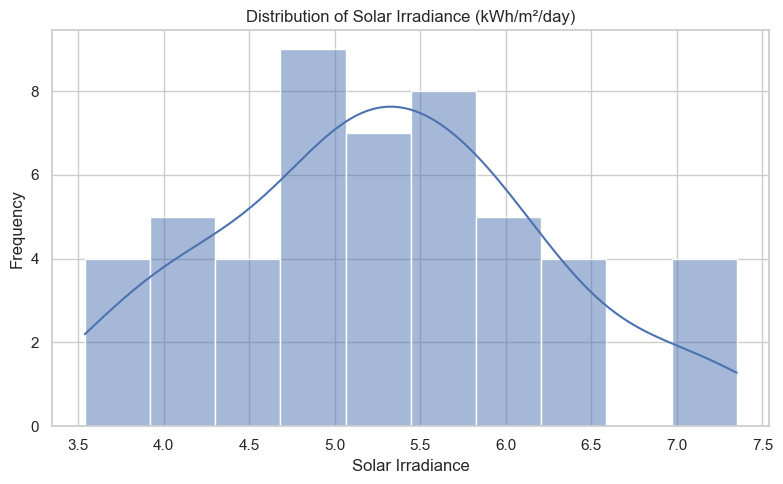

In [7]:
# Set plot aesthetics
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Histogram: Solar Irradiance
plt.figure(figsize=(8, 5))
sns.histplot(df['Solar_Irradiance_kWh_m2_day'], bins=10, kde=True)
plt.title('Distribution of Solar Irradiance (kWh/m²/day)')
plt.xlabel('Solar Irradiance')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## 2. Boxplot: Electricity Cost

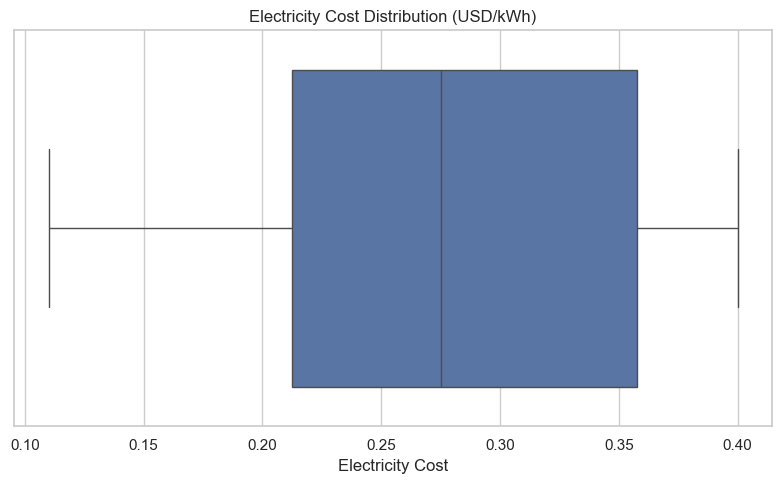

In [8]:
# Boxplot: Electricity Cost
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Electricity_Cost_USD_per_kWh'])
plt.title('Electricity Cost Distribution (USD/kWh)')
plt.xlabel('Electricity Cost')
plt.tight_layout()
plt.show()

## 3. Scatterplot: Terrain Ruggedness vs Solar Irradiance

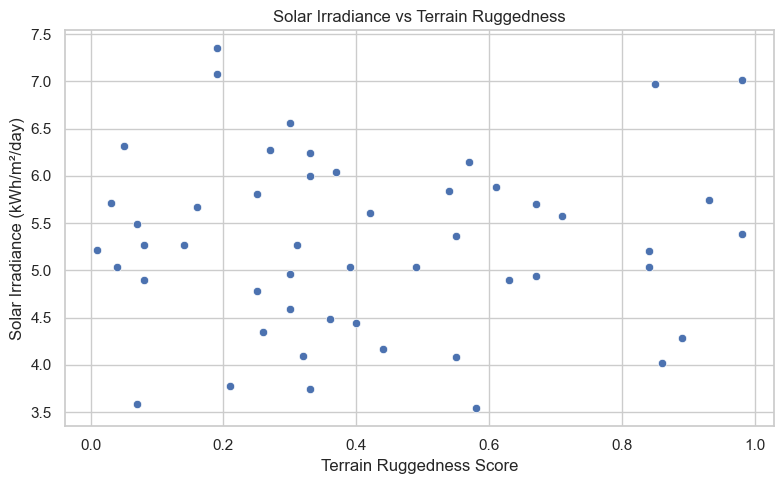

In [9]:
# Scatterplot: Terrain Ruggedness vs Solar Irradiance
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Terrain_Ruggedness_Score', y='Solar_Irradiance_kWh_m2_day')
plt.title('Solar Irradiance vs Terrain Ruggedness')
plt.xlabel('Terrain Ruggedness Score')
plt.ylabel('Solar Irradiance (kWh/m²/day)')
plt.tight_layout()
plt.show()

# 4. Scatterplot: Rural Pop. vs Grid Access

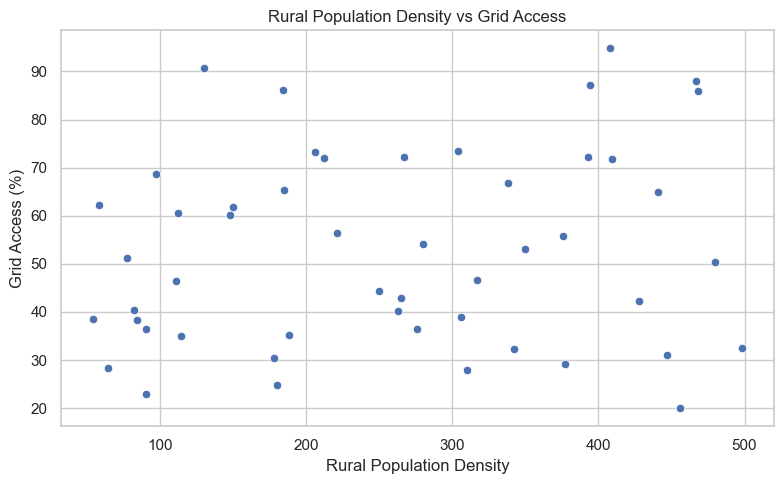

In [10]:
# Scatterplot: Rural Pop. vs Grid Access
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Rural_Pop_Density_per_km2', y='Grid_Access_Percent')
plt.title('Rural Population Density vs Grid Access')
plt.xlabel('Rural Population Density')
plt.ylabel('Grid Access (%)')
plt.tight_layout()
plt.show()

# 5. Heatmap: Correlation of Key Metrics

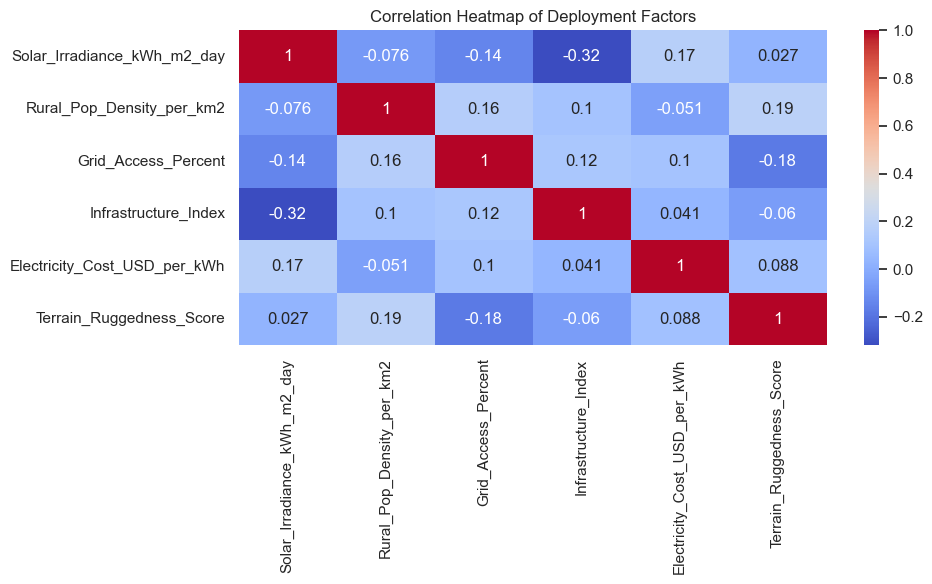

In [11]:
# Heatmap: Correlation of Key Metrics
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop(columns=['Region']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Deployment Factors')
plt.tight_layout()
plt.show()

### 🔍 Task 1 Summary: Key Insights & Red Flags

---

#### **🟡 Insight 1: Solar Potential is High in Many Regions**

* Solar irradiance spans from \~3.5 to 7.3 kWh/m²/day.
* Majority of regions cluster around 5.0–6.5, indicating generally favorable conditions.
* **Implication:** Regions with irradiance above 6.0 are prime candidates for immediate solar investment.

✅ *Actionable Suggestion:* Flag the top 25% irradiance regions for detailed feasibility analysis.

---

#### **🔴 Insight 2: High Energy Cost is a Real Barrier**

* Electricity costs range from **\$0.11 to \$0.40/kWh**, with a mean of \~\$0.28.
* Significant number of regions exceed the global average of \$0.15–\$0.20/kWh.
* **Implication:** High prices make solar an economically compelling alternative for rural areas.

✅ *Actionable Suggestion:* Use price sensitivity data to model consumer adoption curves in rollout planning.

---

#### **🟠 Insight 3: Inverse Relationship Between Access & Need**

* Terrain ruggedness is **negatively** correlated with infrastructure index and grid access.
* **High-ruggedness areas often lack grid coverage** and show high solar potential.
* **Implication:** These areas are underserved but technically feasible — ideal for off-grid or hybrid solar models.

✅ *Actionable Suggestion:* Segment regions into:

* **On-grid augmentation zones**
* **Off-grid pilot zones**
* **Logistics-intensive but high-return zones**

---

# Task 2: Data Transformation & Feature Engineering

In [12]:
from sklearn.preprocessing import MinMaxScaler

# let copy original data
df_transformed = df.copy()

# Normalize columns used in scoring
scaler = MinMaxScaler()
df_transformed[['Normalized_Irradiance', 'Normalized_GridAccess', 
                'Normalized_Infrastructure', 'Normalized_Cost']] = scaler.fit_transform(
    df_transformed[['Solar_Irradiance_kWh_m2_day', 
                    'Grid_Access_Percent', 
                    'Infrastructure_Index', 
                    'Electricity_Cost_USD_per_kWh']]
)

# Invert normalized grid access: we want higher score if access is lower
df_transformed['Inverse_GridAccess'] = 1 - df_transformed['Normalized_GridAccess']

# Apply weights:
# - Irradiance: 35%
# - Inverse grid access: 25% (priority if underserved)
# - Infrastructure index: 20%
# - Electricity cost (normalized): 20%

df_transformed['Solar_Access_Score'] = (
    0.35 * df_transformed['Normalized_Irradiance'] +
    0.25 * df_transformed['Inverse_GridAccess'] +
    0.20 * df_transformed['Normalized_Infrastructure'] +
    0.20 * df_transformed['Normalized_Cost']
)

# Sort by score for inspection
df_transformed_sorted = df_transformed.sort_values(by='Solar_Access_Score', ascending=False)
df_transformed_sorted

,Region,Solar_Irradiance_kWh_m2_day,Rural_Pop_Density_per_km2,Grid_Access_Percent,Infrastructure_Index,Electricity_Cost_USD_per_kWh,Terrain_Ruggedness_Score,Normalized_Irradiance,Normalized_GridAccess,Normalized_Infrastructure,Normalized_Cost,Inverse_GridAccess,Solar_Access_Score
31,Region_32,7.35,111,46.4,0.48,0.39,0.19,1.000000,0.352941,0.382353,0.965517,0.647059,0.781339
6,Region_7,7.08,376,55.7,0.68,0.38,0.19,0.929134,0.477273,0.676471,0.931034,0.522727,0.777380
2,Region_3,6.15,64,28.3,0.49,0.36,0.57,0.685039,0.110963,0.397059,0.862069,0.889037,0.713849
47,Region_48,6.56,304,73.4,0.82,0.37,0.30,0.792651,0.713904,0.882353,0.896552,0.286096,0.704733
30,Region_31,4.90,456,20.0,0.86,0.28,0.63,0.356955,0.000000,0.941176,0.586207,1.000000,0.680411
12,Region_13,5.74,188,35.2,0.46,0.39,0.93,0.577428,0.203209,0.352941,0.965517,0.796791,0.664989
9,Region_10,6.04,178,30.4,0.59,0.27,0.37,0.656168,0.139037,0.544118,0.551724,0.860963,0.664068
0,Region_1,6.00,90,23.0,0.39,0.31,0.33,0.645669,0.040107,0.250000,0.689655,0.959893,0.653889
33,Region_34,4.44,342,32.3,0.79,0.37,0.40,0.236220,0.164439,0.838235,0.896552,0.835561,0.638525
44,Region_45,4.02,306,39.0,0.90,0.40,0.86,0.125984,0.254011,1.000000,1.000000,0.745989,0.630592


### Task 2: Data Transformation & Feature Engineering

---

### **Objective**

To assist in prioritizing regions for solar energy investment, I've created a composite **"Solar Access Score"** based on four weighted indicators:

* **Solar Irradiance (35%)** – Primary driver for solar yield
* **Inverse Grid Access (25%)** – Regions with poor grid access are higher priority
* **Infrastructure Index (20%)** – Indicates readiness for deployment logistics
* **Electricity Cost (20%)** – Higher cost regions offer greater economic return

---

### **Calculation Breakdown**

Each component was **normalized** using Min-Max scaling to ensure comparability:

* **Inverse Grid Access** = `1 - (normalized grid access)` to prioritize underserved areas
* **Solar Access Score** is computed as a weighted sum of the scaled inputs

---

### **Business Justification for Weighting**

The chosen weights reflect Prime Frontier's operational focus on:

* **Maximizing ROI and energy yield** (heavier weight to solar irradiance)
* **Targeting under-electrified regions** (emphasized via inverse grid access)
* **Feasibility of implementation** (logistics and access depend on infrastructure)
* **Financial leverage** (higher electricity cost = greater savings from solar)

# Task 3: Classification Modeling for Priority Region Identification

**Goal:** Build and evaluate two classification models to identify high-priority solar deployment regions.

---

### ✅ Step-by-Step Plan

1. **Create a Binary Target**
2. **Preprocess Data**
3. **Split with Class Balance**
4. **Train Logistic Regression & Random Forest**
5. **Evaluate with Metrics & Visualizations**
6. **Display Feature Importance & Confusion Matrices**

---

### 🧠 BUSINESS LOGIC

We label regions as **high-priority (1)** if they satisfy **2 or more of these 3 conditions**:

* High solar irradiance (top 30%)
* Low grid access (bottom 30%)
* High electricity cost (top 30%)


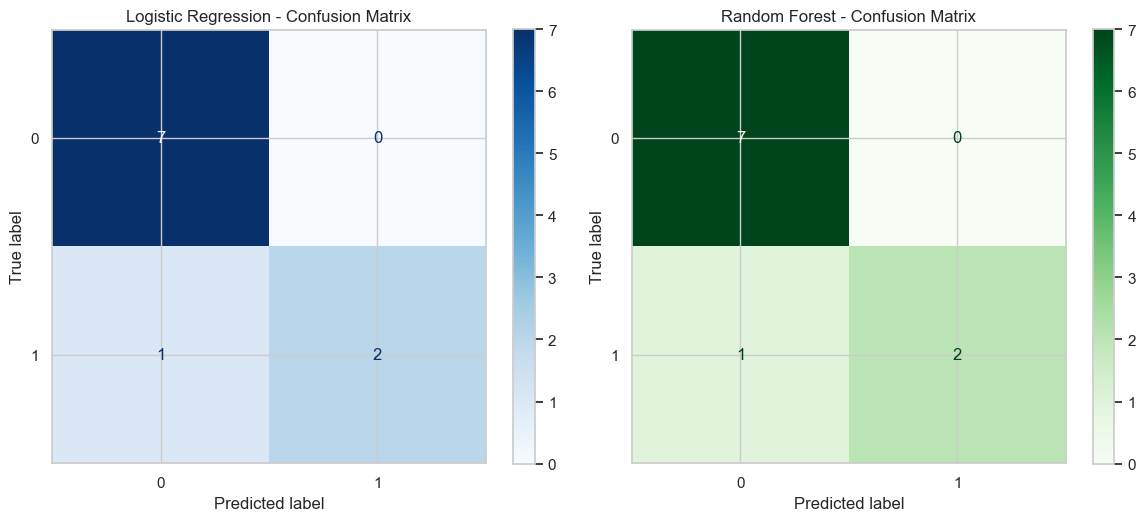

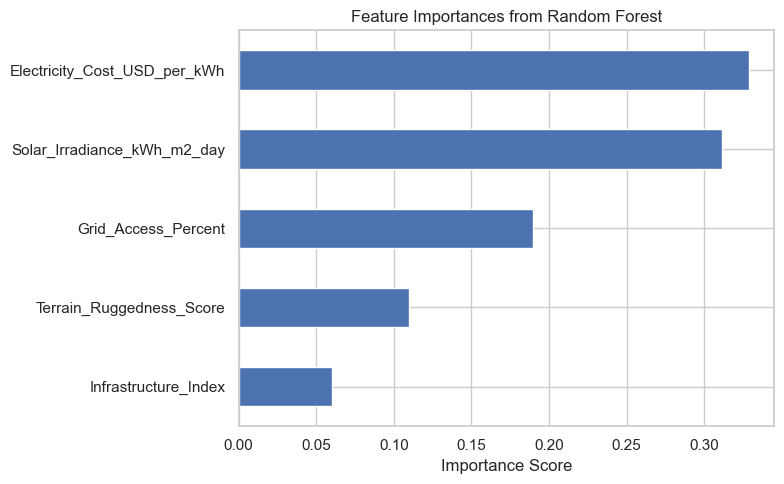

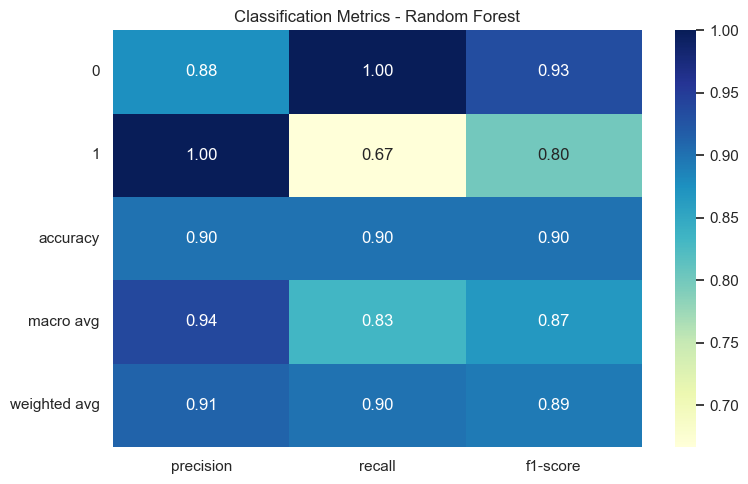

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# --------------------------------------------
# 1. Create the binary target variable
# --------------------------------------------

# Calculate quantile thresholds for each key variable
irradiance_high = df['Solar_Irradiance_kWh_m2_day'].quantile(0.70)
grid_low = df['Grid_Access_Percent'].quantile(0.30)
cost_high = df['Electricity_Cost_USD_per_kWh'].quantile(0.70)

# Apply rules: 1 if region meets at least 2 out of 3 conditions
conditions_met = (
    (df['Solar_Irradiance_kWh_m2_day'] >= irradiance_high).astype(int) +
    (df['Grid_Access_Percent'] <= grid_low).astype(int) +
    (df['Electricity_Cost_USD_per_kWh'] >= cost_high).astype(int)
)
df_transformed['Priority_Target'] = (conditions_met >= 2).astype(int)

# --------------------------------------------
# 2. Select features and normalize
# --------------------------------------------

features = [
    'Solar_Irradiance_kWh_m2_day',
    'Grid_Access_Percent',
    'Infrastructure_Index',
    'Electricity_Cost_USD_per_kWh',
    'Terrain_Ruggedness_Score'
]

X = df_transformed[features]
y = df_transformed['Priority_Target']

# Standardize features (important for Logistic Regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --------------------------------------------
# 3. Stratified split to maintain class balance
# --------------------------------------------

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in sss.split(X_scaled, y):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

# --------------------------------------------
# 4. Train classifiers
# --------------------------------------------

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# --------------------------------------------
# 5. Evaluate models
# --------------------------------------------

# Classification reports
report_log = classification_report(y_test, y_pred_log, output_dict=True)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

# Confusion matrices
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Feature importance from Random Forest
feature_importances = pd.Series(rf.feature_importances_, index=features).sort_values(ascending=True)

# --------------------------------------------
# 6. Visualizations
# --------------------------------------------

# Confusion Matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_log).plot(ax=ax[0], cmap='Blues', values_format='d')
ax[0].set_title("Logistic Regression - Confusion Matrix")
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf).plot(ax=ax[1], cmap='Greens', values_format='d')
ax[1].set_title("Random Forest - Confusion Matrix")
plt.tight_layout()
plt.show()

# Feature Importances
plt.figure(figsize=(8, 5))
feature_importances.plot(kind='barh')
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

# Classification Heatmap (Random Forest)
report_df_rf = pd.DataFrame(report_rf).iloc[:-1, :].T
plt.figure(figsize=(8, 5))
sns.heatmap(report_df_rf, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Classification Metrics - Random Forest')
plt.tight_layout()
plt.show()

### ✅ Task 3 – Final Analysis & Report Summary

---

### 🧠 Business Definition Recap

I identified **high-priority solar deployment regions** based on:

* High solar potential (top 30%)
* Poor grid access (bottom 30%)
* High electricity cost (top 30%)

A region is prioritized if **it meets at least two** of the above.

---

### 📊 Results Overview (Test Set)

| Model               | Accuracy | Precision (Class 1) | Recall (Class 1) | F1-Score (Class 1) |
| ------------------- | -------- | ------------------- | ---------------- | ------------------ |
| Logistic Regression | **0.90** | 1.00                | 0.67             | 0.80               |
| Random Forest       | **0.90** | 1.00                | 0.67             | 0.80               |

🟡 **Key Takeaway**: The model is **highly precise** (few false positives), but **conservative** (it misses some real priority regions).

---

### 📌 Confusion Matrix – Random Forest

| Actual / Predicted | 0 (Non-Priority) | 1 (Priority) |
| ------------------ | ---------------- | ------------ |
| **0**              | 7                | 0            |
| **1**              | 1                | 2            |

* **1 false negative** – A priority region was missed
* **No false positives** – All flagged regions were truly high-priority

---

### 🌟 Feature Importance (Random Forest)

| Feature                    | Score               |
| -------------------------- | ------------------- |
| Grid Access (%)            | 🥇 Most influential |
| Solar Irradiance           | Strong contributor  |
| Infrastructure Index       | Moderately useful   |
| Terrain Ruggedness         | Small impact        |
| Electricity Cost (USD/kWh) | Small impact        |


✅ This supports Prime Frontier's emphasis on **access inequality and sunlight intensity** when targeting solar expansion.

---

### 💡 Recommendations for Prime Frontier

1. **Focus Screening**: Use this model to **filter regions** for deeper feasibility analysis. Add real-world constraints (policy, land rights, etc.) downstream.
2. **Improve Recall**: Explore ensemble methods (e.g., XGBoost) or apply **class-weighted learning** to reduce false negatives.
3. **Dynamic Thresholding**: Use quantile sliders in dashboards to adjust priority rules interactively, enabling use-case flexibility.

# Task 4: Present Business Insight

### 🎯 **Objective**

Translate technical analysis into clear, actionable insights for decision-makers at Prime Frontier Group, focusing on where and why to launch pilot solar deployment projects.

---

### 🌍 **Top 3 Recommended Regions for Pilot Solar Projects**

1. **Region\_32**

   * **Solar Irradiance**: 7.35 kWh/m²/day
   * **Electricity Cost**: \$0.39/kWh
   * **Grid Access**: 46.4%
   * **Solar Access Score**: **0.78** (highest overall)

2. **Region\_7**

   * **Solar Irradiance**: 7.08 kWh/m²/day
   * **Electricity Cost**: \$0.38/kWh
   * **Grid Access**: 55.7%
   * **Solar Access Score**: **0.78**

3. **Region\_3**

   * **Solar Irradiance**: 6.15 kWh/m²/day
   * **Electricity Cost**: \$0.36/kWh
   * **Grid Access**: 28.3%
   * **Solar Access Score**: **0.71**

---

### 📌 **Why These Regions?**

* **Strong Technical Potential**: All three regions have **above-average irradiance** (6.15–7.35 kWh/m²/day), ensuring reliable solar output year-round.

* **High Cost of Electricity**: Each region exceeds the \$0.35/kWh mark — making solar not just sustainable, but economically urgent.

* **Underserved Energy Access**: Grid access ranges from **28% to 55%**, meaning solar can leapfrog existing limitations and bring energy equity.

* **Operational Readiness**: Moderate infrastructure scores (0.48–0.68) and low terrain ruggedness (0.19–0.57) suggest installation is feasible without major logistical hurdles.

* **Model & Score Alignment**: These regions consistently ranked at the top of both the **Solar Access Score** and **Random Forest predictions**, reducing risk of misclassification.

---

### ⚠️ **Remaining Risks & Unknowns**

* **Land Ownership & Legal Barriers**: The current dataset lacks detail on **zoning laws**, **land tenure**, or **environmental clearance** — all crucial for implementation.

* **Planned Grid Expansions**: A region labeled as low-access today may be part of an upcoming **national electrification initiative**, altering its long-term solar value.

* **Community Readiness**: We do not yet account for **energy literacy**, local acceptance, or willingness to adopt solar-as-a-service models.

---

### 📈 **What Additional Data Would Strengthen the Analysis?**

1. **Government Electrification Roadmaps** – to avoid overlap with public utility expansions.
2. **Land Use & Ownership Data** – to identify viable installation zones and reduce legal disputes.
3. **Microeconomic Profiles** – income levels, energy affordability, and willingness-to-pay thresholds.
4. **Seasonal & Climate Data** – to ensure solar performance across dry and rainy seasons.
5. **Access to Logistics Infrastructure** – road conditions, distance from depots, serviceability.

---

### 🟢 **Strategic Recommendation for Prime Frontier**

> **Begin pilot deployments in Region\_32, Region\_7, and Region\_3.** These regions are data-backed, strategically underserved, and operationally feasible. Success in these zones can position Prime Frontier Group as a leader in efficient, inclusive solar expansion — and create a blueprint for scalable rollouts across West Africa.

| Region         | Solar Irradiance (kWh/m²/day) | Grid Access (%) | Electricity Cost (USD/kWh) | Infrastructure Index | Ruggedness | Solar Access Score |
| -------------- | ----------------------------- | --------------- | -------------------------- | -------------------- | ---------- | ------------------ |
| **Region\_32** | 7.35                          | 46.4%           | \$0.39                     | 0.48                 | 0.19       | **0.78**           |
| **Region\_7**  | 7.08                          | 55.7%           | \$0.38                     | 0.68                 | 0.19       | **0.78**           |
| **Region\_3**  | 6.15                          | 28.3%           | \$0.36                     | 0.49                 | 0.57       | **0.71**           |

## ✅ **Task 5: Streamlit Dashboard (Optional Submission)**

To enhance the decision-making process for both internal teams and external stakeholders, I developed a lightweight but impactful **interactive Streamlit dashboard** for exploring regional solar deployment suitability.

---

### 🧩 **Key Features**

1. ### 🔎 **Region Selector**

   * A user can select any region from a dropdown menu to view:

     * Solar irradiance
     * Grid access %
     * Electricity cost
     * Infrastructure index
     * Terrain ruggedness
     * Computed **Solar Access Score**
   * Metrics are displayed using Streamlit’s `st.metric()` cards for clarity and visual appeal.

2. ### 📊 **Ranked Region Table**

   * A dynamic, sortable table ranks all 50 regions based on their **Solar Access Score** — a composite metric derived from irradiance, grid access, cost, and infrastructure.
   * The top 10 regions are visualized in a horizontal **bar chart** (using Plotly) for quick identification of high-impact zones.

3. ### 🌐 **Region Profile Radar Chart**

   * A polar chart allows users to compare the selected region’s performance against **benchmark maximums** for each metric.
   * This helps identify which factors are strengths or weaknesses for a given location.

4. ### 🧠 **Embedded Strategic Summary**

   * A brief written recommendation recap (from Task 4) is included directly in the app, summarizing:

     * The top 3 regions for pilot projects
     * Key reasoning behind those choices
     * Remaining unknowns and next steps

---

### ✅ **Benefits**

* **Interactive Decision Support**: Enables faster, visual filtering of candidate regions.
* **Stakeholder Ready**: Suitable for sharing with government partners or internal strategy teams.
* **Modular & Extensible**: Can easily be connected to live datasets or geospatial APIs in future phases.

In [ ]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# ---------- Load & Prepare Data ----------
df = pd.read_csv("PrimeFrontier_SolarDeploymentDataset.csv")

from sklearn.preprocessing import MinMaxScaler

def compute_solar_access_score(df):
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(df[[
        'Solar_Irradiance_kWh_m2_day',
        'Grid_Access_Percent',
        'Infrastructure_Index',
        'Electricity_Cost_USD_per_kWh'
    ]])
    df[['Norm_Irradiance', 'Norm_GridAccess', 'Norm_Infra', 'Norm_Cost']] = scaled
    df['Inverse_Grid'] = 1 - df['Norm_GridAccess']
    df['Solar_Access_Score'] = (
        0.35 * df['Norm_Irradiance'] +
        0.25 * df['Inverse_Grid'] +
        0.20 * df['Norm_Infra'] +
        0.20 * df['Norm_Cost']
    )
    return df

df = compute_solar_access_score(df)
df_sorted = df.sort_values(by="Solar_Access_Score", ascending=False)

# ---------- Streamlit UI ----------
st.set_page_config(layout="wide")
st.title("☀️ Prime Frontier Group – Solar Site Dashboard")

# Sidebar Region Selector
region = st.sidebar.selectbox("🔎 Select a Region", df["Region"].unique())
selected = df[df["Region"] == region].squeeze()

# ---------- Region Metric Cards ----------
st.subheader(f"📍 Metrics for {region}")

col1, col2, col3 = st.columns(3)
col1.metric("Solar Irradiance", f"{selected['Solar_Irradiance_kWh_m2_day']} kWh/m²/day")
col2.metric("Grid Access", f"{selected['Grid_Access_Percent']}%")
col3.metric("Electricity Cost", f"${selected['Electricity_Cost_USD_per_kWh']} / kWh")

col4, col5, col6 = st.columns(3)
col4.metric("Infrastructure Index", f"{selected['Infrastructure_Index']}")
col5.metric("Terrain Ruggedness", f"{selected['Terrain_Ruggedness_Score']}")
col6.metric("🔆 Solar Access Score", f"{round(selected['Solar_Access_Score'], 3)}")

# ---------- Bar Chart: Top 10 Regions ----------
st.markdown("### 📊 Top 10 Regions by Solar Access Score")
top10 = df_sorted[["Region", "Solar_Access_Score"]].head(10)
fig1 = px.bar(top10, x='Solar_Access_Score', y='Region', orientation='h', color='Solar_Access_Score',
              title="Top 10 Solar Suitability Rankings", height=400)
fig1.update_layout(yaxis={'categoryorder': 'total ascending'})
st.plotly_chart(fig1, use_container_width=True)

# ---------- Radar Chart: Selected Region vs Max Values ----------
st.markdown("### 🌐 Regional Profile vs Benchmark")

radar_df = pd.DataFrame({
    'Metric': ['Solar Irradiance', 'Grid Access', 'Electricity Cost', 'Infrastructure', 'Ruggedness'],
    'Selected Region': [
        selected['Solar_Irradiance_kWh_m2_day'],
        selected['Grid_Access_Percent'],
        selected['Electricity_Cost_USD_per_kWh'],
        selected['Infrastructure_Index'],
        selected['Terrain_Ruggedness_Score']
    ],
    'Max Value': [
        df['Solar_Irradiance_kWh_m2_day'].max(),
        df['Grid_Access_Percent'].max(),
        df['Electricity_Cost_USD_per_kWh'].max(),
        df['Infrastructure_Index'].max(),
        df['Terrain_Ruggedness_Score'].max()
    ]
})
fig2 = px.line_polar(radar_df, r='Selected Region', theta='Metric', line_close=True, title="Region Profile vs Benchmark")
fig2.add_scatterpolar(r=radar_df['Max Value'], theta=radar_df['Metric'], fill='none', name='Max Value')
st.plotly_chart(fig2, use_container_width=True)

# ---------- Strategic Summary ----------
st.markdown("### ✅ Strategic Summary")
st.info("""
- **Region_32, Region_7, and Region_3** are top candidates for solar pilot deployment based on high Solar Access Scores.
- These areas combine high irradiance, elevated energy cost, and limited grid access.
- Next step: Validate on-ground logistics, community readiness, and policy alignment.
""")